In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, classification_report

# Load the data
df = pd.read_csv('initial_cleaned_winner_data.csv')

# Convert 'Race Date' to datetime
df['Race Date'] = pd.to_datetime(df['Race Date'])

# Sort the dataframe by date
df = df.sort_values('Race Date')

# Create features and target
X = df[['Driver POS Standings', 'Laps', 'Team Race Points', 'Team Champ Points', 'Team Champ Pos', 'Driver Champ Points', 'Driver Champ Pos']]
y = df['Winner']

# Get the last two years of data
last_two_years = df['season'].unique()[-2:]
test_data = df[df['season'].isin(last_two_years)]
train_data = df[~df['season'].isin(last_two_years)]

X_train = train_data[X.columns]
y_train = train_data['Winner']
X_test = test_data[X.columns]
y_test = test_data['Winner']

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Print classification report
recall = recall_score(y_test, y_pred, pos_label=True)
print(f"Recall for True cases: {recall:.2f}")


# Add predictions to the test dataframe
test_data['Predicted_Winner'] = y_pred

# Sort and print winners
winners = test_data[test_data['Predicted_Winner'] == True][['season', 'raceNumber', 'Driver Code']]
winners = winners.rename(columns={'Driver Code': 'Winner Code'})
winners = winners.sort_values(['season', 'raceNumber'])
print("\nPredicted Winners for the last two years (sorted by year and race number):")
print(winners)

Model Accuracy: 0.96
Recall for True cases: 0.61

Predicted Winners for the last two years (sorted by year and race number):
      season  raceNumber  Winner Code
8321    2021           1          830
8320    2021           1            1
8281    2021           2            1
8361    2021           3          830
8362    2021           3          822
8360    2021           3            1
8381    2021           4          830
8380    2021           4            1
8401    2021           5          830
8460    2021           7          830
8461    2021           7            1
8441    2021           8            1
8440    2021           8          830
8480    2021           9          830
8500    2021          10            1
8521    2021          11            1
8561    2021          13            1
8560    2021          13          830
8621    2021          16          830
8640    2021          17          830
8660    2021          18          830
8681    2021          19          830
8

C:\Users\himan\AppData\Local\Temp\ipykernel_15364\532116029.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_Winner'] = y_pred


Model Accuracy: 0.94
Recall for True cases: 0.77

Best Parameters:
{'classifier__C': 0.1, 'classifier__class_weight': {True: 3, False: 1}, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}

Predicted Winners for the last two years (sorted by year and race number):
      season  raceNumber  Winner Code
8321    2021           1          830
8322    2021           1          822
8324    2021           1          815
8320    2021           1            1
8281    2021           2            1
...      ...         ...          ...
9125    2022          21          830
9123    2022          21          844
9121    2022          21            1
9120    2022          21          847
9140    2022          22          830

[79 rows x 3 columns]


C:\Users\himan\AppData\Local\Temp\ipykernel_15364\3676248888.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_Winner'] = y_pred


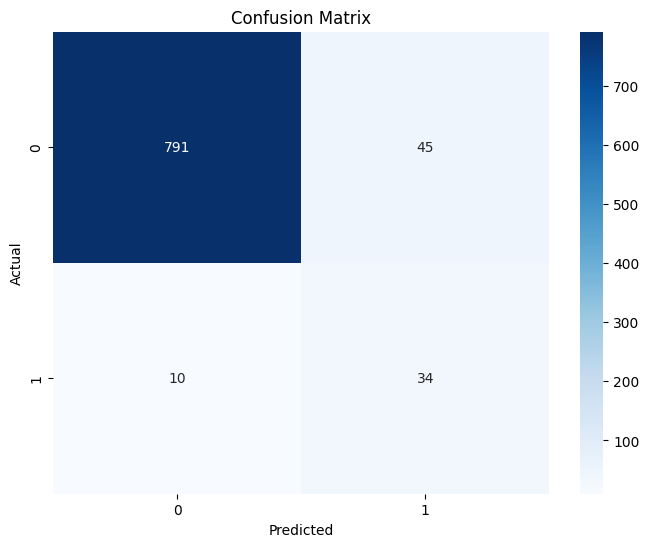

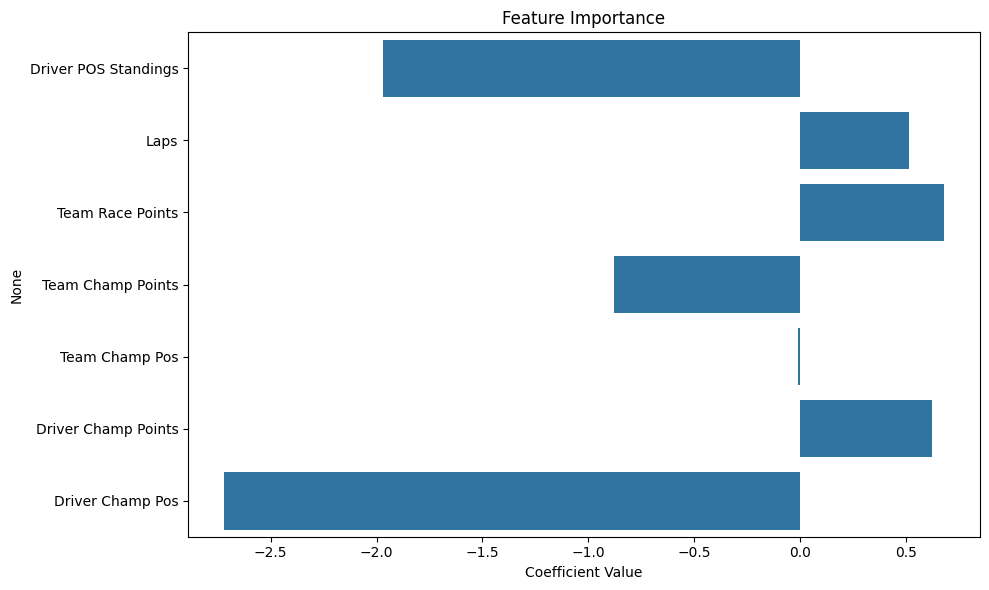

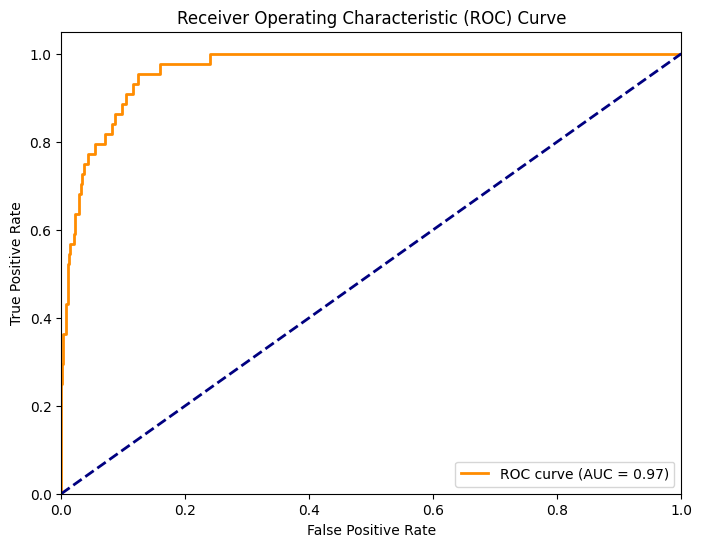

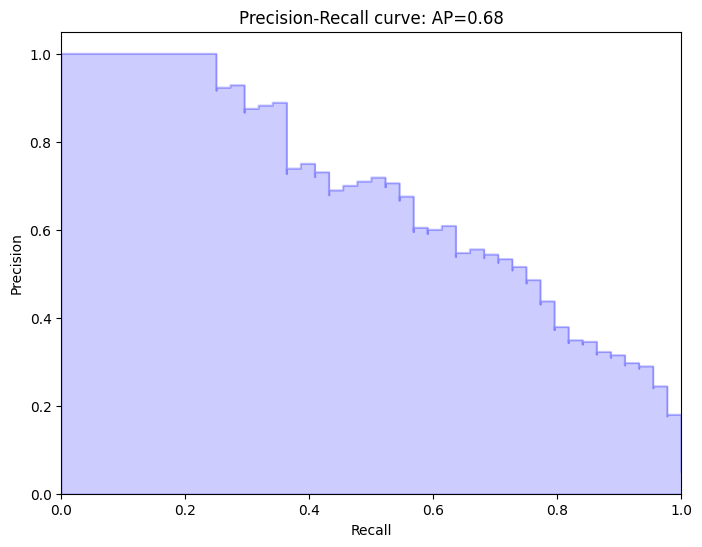

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.pipeline import Pipeline

# Load and preprocess data (assuming this part remains the same)
# ...

# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42))
])

# Define hyperparameters to tune
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__class_weight': ['balanced', {True: 2, False: 1}, {True: 3, False: 1}],
    'classifier__solver': ['liblinear', 'saga'],
    'classifier__penalty': ['l1', 'l2']
}

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get best model
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Print classification report
recall = recall_score(y_test, y_pred, pos_label=True)
print(f"Recall for True cases: {recall:.2f}")

# Print best parameters
print("\nBest Parameters:")
print(grid_search.best_params_)

# Add predictions to the test dataframe
test_data['Predicted_Winner'] = y_pred

# Sort and print winners
winners = test_data[test_data['Predicted_Winner'] == True][['season', 'raceNumber', 'Driver Code']]
winners = winners.rename(columns={'Driver Code': 'Winner Code'})
winners = winners.sort_values(['season', 'raceNumber'])
print("\nPredicted Winners for the last two years (sorted by year and race number):")
print(winners)




import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# ... (previous code remains the same)

# After getting the best model and making predictions, add these visualizations:

# 1. Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 2. Feature Importance
feature_importance = best_model.named_steps['classifier'].coef_[0]
feature_names = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_names)
plt.title('Feature Importance')
plt.xlabel('Coefficient Value')
plt.tight_layout()
plt.show()

# 3. ROC Curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# 4. Precision-Recall Curve
from sklearn.metrics import precision_recall_curve, average_precision_score
precision, recall, _ = precision_recall_curve(y_test, best_model.predict_proba(X_test)[:, 1])
avg_precision = average_precision_score(y_test, best_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'Precision-Recall curve: AP={avg_precision:.2f}')
plt.show()

# ... (rest of the code remains the same)